In [2]:
#eminst dataset (pypi)
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

#visualize tools
import cv2
import matplotlib.pyplot as plt

#basic tools
import pandas as pd
import numpy as np

#tensorflow
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
#import emnist dataset from pypi
print('list_dataset: ',list_datasets())

#extract training and testing
X_train, y_train = extract_training_samples('letters')
X_test, y_test = extract_test_samples('letters')

#re-check shape
print('training_shape: ', X_train.shape)
print('training_label_shape: ', y_train.shape)
print('test_shape: ', X_test.shape)
print('test_label_shape: ', y_test.shape)

list_dataset:  ['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
training_shape:  (124800, 28, 28)
training_label_shape:  (124800,)
test_shape:  (20800, 28, 28)
test_label_shape:  (20800,)


**<font size=5>Defines all function here**

In [4]:
#preparign function for preprocessing and visualize samples 
def why_u_not_create_function(image):
    #using gaussian blur
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp1 = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    
    #using inverse binary threshold 
    thresh = 250
    maxval = 240
    ret,thres = cv2.threshold(image_sharp1,thresh,maxval,cv2.THRESH_BINARY_INV)
    return ret, thres, image_sharp1

def interpolation_thres(thres, i): #nearest, area, cubic, linear
    bgr = np.dstack((thres,thres,thres))
    interpolation = cv2.resize(bgr, 
                               (224, 224), 
                               interpolation= i)
    
    return interpolation

def why_u_not_create_visualize_function(image, cmap): #optional for visual one pic
    fig = plt.figure(figsize=(8,4))
    plt.imshow( image, cmap=cmap )
    plt.clim(vmin=0, vmax = 255)
    plt.colorbar()
    
    
def visualize_after_filter(rows, cols, cmaps, image, labels):
    row = rows
    col = cols
    num_pic_test = row*col
    fig = plt.figure(figsize=(10,6))
    for j in range(num_pic_test):
        plt.subplot(row, col, j+1)
        plt.imshow(image[col+j], cmap=cmaps)
        plt.title(labels[col+j])
        plt.axis('off') #ถ้าอยากเอา scale ภาพออกให้ set off
    plt.show()

    
def visualize_all(row, col, cmap, viz_list):
    viz_lst = viz_list
    
    for i in viz_lst:
        #training 
        print('*'*20,str(i[2]),'*'*20)
        visualize_after_filter(rows=row, 
                               cols=col, 
                               cmaps=cmap, 
                               image=i[0], 
                               labels=training_labels)
        print(str(i[2]),'.shape: ',np.array(i[0]).shape,'\n')

        #testing 
        print('*'*20,str(i[3]),'*'*20)
        visualize_after_filter(rows=row, 
                               cols=col, 
                               cmaps=cmap, 
                               image=i[1], 
                               labels=test_labels)
        print(str(i[3]),'.shape: ',np.array(i[1]).shape,'\n')

        print('*'*58,'\n')

   

In [5]:
#training
train_thres_deck = []
train_sharp_deck = []
training_labels = []

train_inter_area = []
train_cubic = []
train_nearest = []
train_linear = []
for i in range(len(X_train)): 
    ret, thres, img_sharp = why_u_not_create_function(X_train[i])
    
    #interpolation
    pic_inter_area_train = cv2.resize(thres, (64,64), interpolation=cv2.INTER_AREA)
    pic_cubic_train = cv2.resize(thres, (64,64), interpolation=cv2.INTER_CUBIC)
    pic_nearest_train = cv2.resize(thres, (64,64), interpolation=cv2.INTER_NEAREST)
    pic_linear_train = cv2.resize(thres, (64,64), interpolation=cv2.INTER_LINEAR)
    
    #append
    train_thres_deck.append(thres)
    train_sharp_deck.append(img_sharp)
    training_labels.append(y_train[i])
    
    train_inter_area.append(pic_inter_area_train)
    train_cubic.append(pic_cubic_train)
    train_nearest.append(pic_nearest_train)
    train_linear.append(pic_linear_train)
    
#testing
test_thres_deck = []
test_sharp_deck = []
test_labels = []

test_inter_area = []
test_cubic = []
test_nearest = []
test_linear = []
for i in range(len(X_test)): 
    ret, thres_test, img_sharp_test = why_u_not_create_function(X_test[i])
    
    #interpolation
    pic_inter_area_test = cv2.resize(thres_test, (64,64), interpolation=cv2.INTER_AREA)
    pic_cubic_test = cv2.resize(thres_test, (64,64), interpolation=cv2.INTER_CUBIC)
    pic_nearest_test = cv2.resize(thres_test, (64,64), interpolation=cv2.INTER_NEAREST)
    pic_linear_test = cv2.resize(thres_test, (64,64), interpolation=cv2.INTER_LINEAR)
    
    #append
    test_thres_deck.append(thres_test)
    test_sharp_deck.append(img_sharp_test)
    test_labels.append(y_test[i])
    
    test_inter_area.append(pic_inter_area_test)
    test_cubic.append(pic_cubic_test)
    test_nearest.append(pic_nearest_test)
    test_linear.append(pic_linear_test)
    
print('number of training',len(train_thres_deck))
print('number of training_labels',len(training_labels))

print('*'*40)
print('number of test',len(test_thres_deck))
print('number of test_labels',len(test_labels))

number of training 124800
number of training_labels 124800
****************************************
number of test 20800
number of test_labels 20800


**<font size=5>Visualize All**

input rows(number):1
input cols(number):5
which cmap??: binary
******************** train_orinal ********************


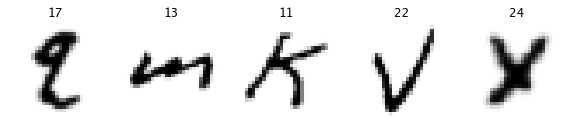

train_orinal .shape:  (124800, 28, 28) 

******************** test_orinal ********************


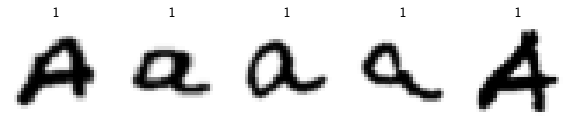

test_orinal .shape:  (20800, 28, 28) 

********************************************************** 

******************** train_sharp ********************


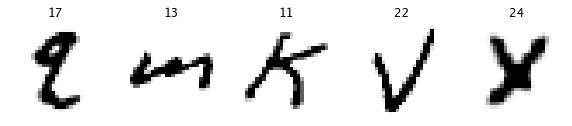

train_sharp .shape:  (124800, 28, 28) 

******************** test_sharp ********************


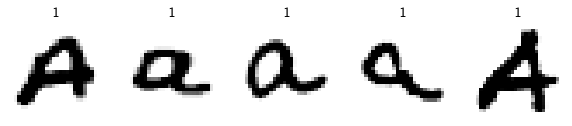

test_sharp .shape:  (20800, 28, 28) 

********************************************************** 

******************** train_threshold binary inv ********************


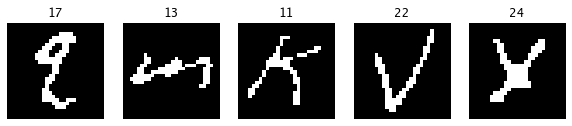

train_threshold binary inv .shape:  (124800, 28, 28) 

******************** test_threshold binary inv ********************


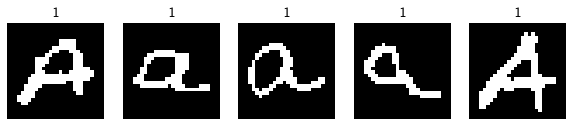

test_threshold binary inv .shape:  (20800, 28, 28) 

********************************************************** 



In [6]:
#กำหนด rows กับ cols ก่อนว่าจะดูกี่รูป
row = int(input('input rows(number):')) #จะให้ viz กี่แถว
col = int(input('input cols(number):')) #จะให้ viz กี่คอลัมน์
cmap = input('which cmap??: ') #binary, jet

viz_lst = [[X_train, X_test, 'train_orinal', 'test_orinal'], 
            [train_sharp_deck, test_sharp_deck, 'train_sharp', 'test_sharp'],
            [train_thres_deck, test_thres_deck, 'train_threshold binary inv', 'test_threshold binary inv']]
    
visualize_all(row=row,col=col,cmap=cmap, viz_list=viz_lst)

**<font size=5>Interpolation**

input rows(number):1
input cols(number):5
which cmap??: binary
******************** train_inter_area ********************


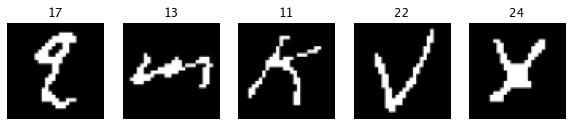

train_inter_area .shape:  (124800, 64, 64) 

******************** test_inter_area ********************


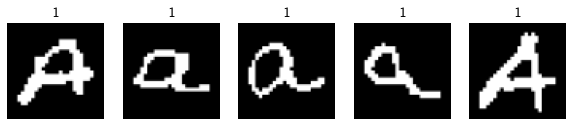

test_inter_area .shape:  (20800, 64, 64) 

********************************************************** 

******************** train_cubic ********************


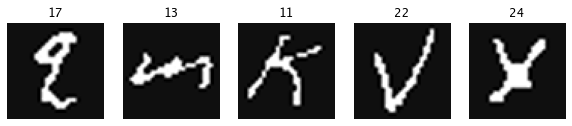

train_cubic .shape:  (124800, 64, 64) 

******************** test_cubic ********************


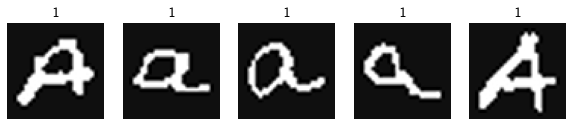

test_cubic .shape:  (20800, 64, 64) 

********************************************************** 

******************** train_nearest ********************


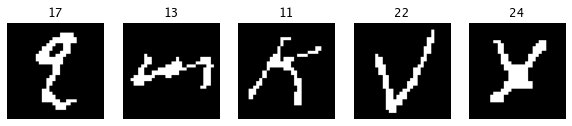

train_nearest .shape:  (124800, 64, 64) 

******************** test_nearest ********************


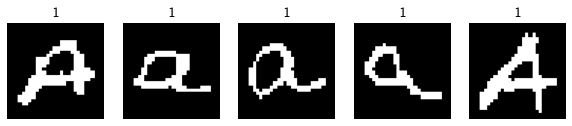

test_nearest .shape:  (20800, 64, 64) 

********************************************************** 

******************** train_linear ********************


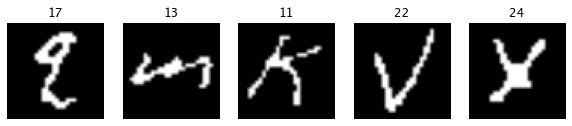

train_linear .shape:  (124800, 64, 64) 

******************** test_linear ********************


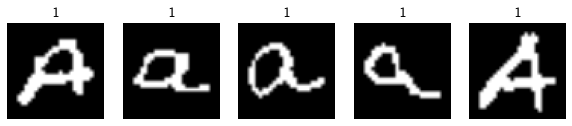

test_linear .shape:  (20800, 64, 64) 

********************************************************** 



In [7]:
#กำหนด rows กับ cols ก่อนว่าจะดูกี่รูป
row = int(input('input rows(number):')) #จะให้ viz กี่แถว
col = int(input('input cols(number):')) #จะให้ viz กี่คอลัมน์
cmap = input('which cmap??: ') #binary, jet

viz_lst = [[train_inter_area, test_inter_area, 'train_inter_area', 'test_inter_area'],
            [train_cubic, test_cubic, 'train_cubic', 'test_cubic'],
            [train_nearest, test_nearest, 'train_nearest', 'test_nearest'],
            [train_linear, test_linear, 'train_linear', 'test_linear']
                ]
    
visualize_all(row=row,col=col,cmap=cmap, viz_list=viz_lst)

**<font size=5>Data Augmentation**

In [8]:
#threshold binary inverse
thres_train = np.array(train_thres_deck)
x_train_thres = thres_train.reshape(thres_train.shape[0], 1, 28, 28, order='A')
print('train_thres_deck:',thres_train.shape)
print('thres_binary_inv_training:',x_train_thres.shape)

thres_test = np.array(test_thres_deck)
x_test_thres = thres_test.reshape(thres_test.shape[0], 1, 28, 28, order='A')
print('train_thres_deck:',thres_test.shape)
print('thres_binary_inv_test:',x_test_thres.shape)


#Data Augmentation
gen = ImageDataGenerator(rotation_range=12,
                        width_shift_range=0.1,
                        shear_range=0.3,
                        height_shift_range=0.1,
                        zoom_range=0.1,
                        data_format='channels_first')

#flow เข้า model ตรงนี้ ถ้าจะเอาไป train
batch_size = 512
train_batches = gen.flow(x_train_thres, training_labels, batch_size=batch_size)
test_batches = gen.flow(x_test_thres, test_labels, batch_size=batch_size)

steps_per_epoch = int(np.ceil(train_batches.n/batch_size))
validation_steps = int(np.ceil(test_batches.n/batch_size))

train_thres_deck: (124800, 28, 28)
thres_binary_inv_training: (124800, 1, 28, 28)
train_thres_deck: (20800, 28, 28)
thres_binary_inv_test: (20800, 1, 28, 28)


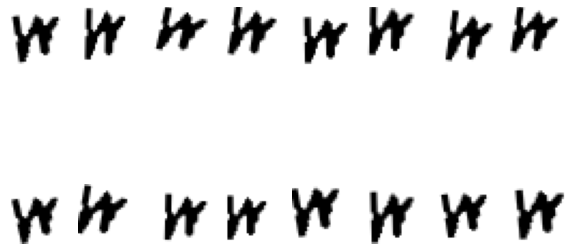

In [13]:
#training
#reshape image
img = np.expand_dims(x_train_thres[0], axis=0)
aug_iter = gen.flow(img)
aug_img = next(aug_iter)[0].astype(np.float32)


#visualize image after augmented
#num_img = int(input('number of pics u wanna see(input only number):'))
num_img = 16
f = plt.figure(figsize=(10,6))
for i in range(num_img):
    sp = f.add_subplot(2, 26//3, i+1)
    sp.axis('Off')
    aug_img = next(aug_iter)[0].astype(np.float32)
    plt.imshow(aug_img[0], cmap='gray')

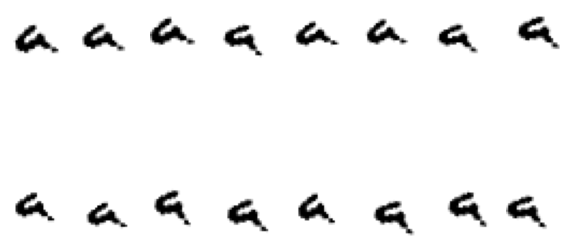

In [14]:
#testing
#reshape image
img = np.expand_dims(x_test_thres[0], axis=0)
aug_iter = gen.flow(img)
aug_img = next(aug_iter)[0].astype(np.float32)


#visualize image after augmented
#num_img = int(input('number of pics u wanna see(input only number):'))
num_img = 16
f = plt.figure(figsize=(10,6))
for i in range(num_img):
    sp = f.add_subplot(2, 26//3, i+1)
    sp.axis('Off')
    aug_img = next(aug_iter)[0].astype(np.float32)
    plt.imshow(aug_img[0], cmap='gray')